In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_excel("../../data/covid-indo/raw/Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name="Data Jakarta")

# Confirmed Cases Forecasting (Indo)

In [3]:
data[data["Country/Region"] == "Indonesia"].head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3114,3115,03/02/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3258,3259,03/03/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3421,3422,03/04/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3590,3591,03/05/2020,NaN,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3760,3761,03/06/2020,NaN,Indonesia,2020-03-06T12:33:03,4.0,0.0,0.0


In [4]:
confirmed_data = data[data["Country/Region"] == "Indonesia"].copy()
confirmed_data = confirmed_data[["ObservationDate", "Confirmed"]]
confirmed_data["ObservationDate"] = pd.to_datetime(confirmed_data["ObservationDate"])
confirmed_data.set_index("ObservationDate", inplace=True)
confirmed_data

,Confirmed
ObservationDate,
2020-03-02,2.0
2020-03-03,2.0
2020-03-04,2.0
2020-03-05,2.0
2020-03-06,4.0
...,...
2021-05-25,1786187.0
2021-05-26,1791221.0
2021-05-27,1797499.0


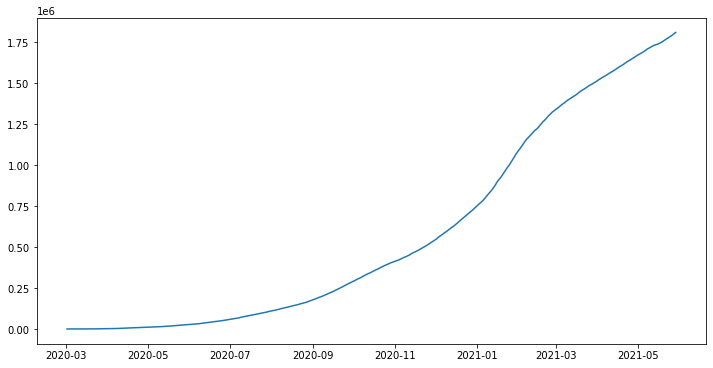

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(confirmed_data.index, confirmed_data["Confirmed"])
plt.show()

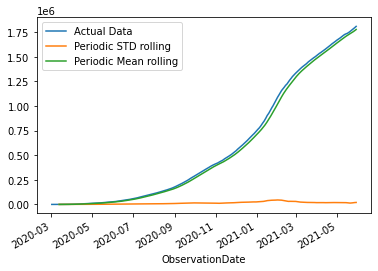

In [6]:
confirmed_rolling = confirmed_data.copy()

plt.plot(confirmed_data.index, confirmed_data["Confirmed"], label="Actual Data")
confirmed_rolling["Confirmed"].rolling(12).std().plot(label="Periodic STD rolling")
confirmed_rolling["Confirmed"].rolling(12).mean().plot(label="Periodic Mean rolling")
plt.legend()
plt.show()

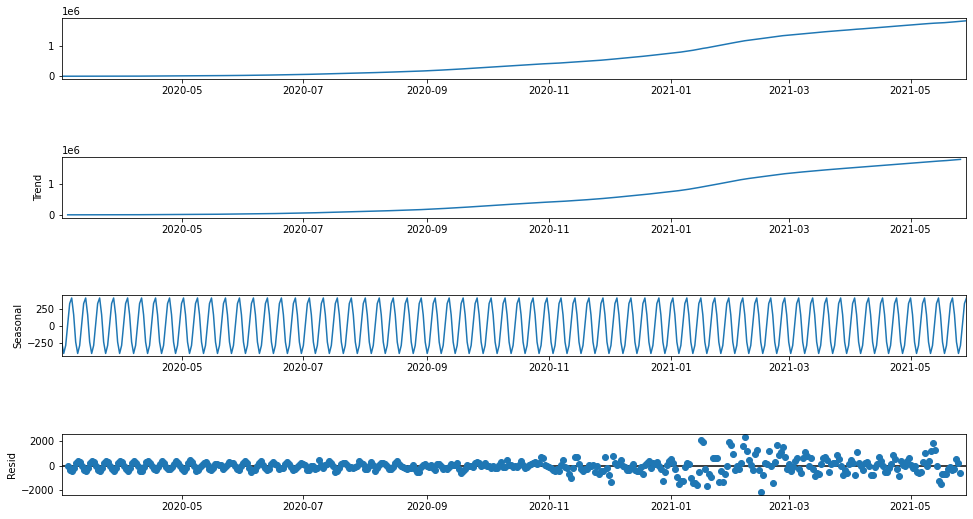

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(confirmed_rolling)
fig = decompose.plot()
fig.set_size_inches(15, 8)

In [55]:
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
result = adfuller(confirmed_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.514327
p-value: 0.985302


Karena p value > 5%, berarti dia ndak stationary, berarti harus cari d order